###  아래 가이드에 따라서 1000명의 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

#### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.
고객별 속성 데이터
- id : 1 ~ 1000 고객 번호
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- no : 1 ~ 10000번 일련번호
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10 ~ 30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- amount_20 : price_20 * quantity_21
- amount_21 : price_21 * quantity_21

#### Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

#### Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
######################### 고객 속성 데이터 생성을 위한 random Field 생성
CustID=np.arange(10001, 11001)                                                                                         ## 고객 ID
Gender=np.random.choice(2, size=1000)                                                                                   ## 고객 Gender Female: 0, Male: 1 # gender=np.random.randint(2, size=1000) 동일
Age=np.random.randint(10,101, size=1000)                                                                                ## 고객 나이 10~100세
Region=np.random.randint(1,11, size=1000)                                                                               ## 구매 고객 지역: 1~10 지역

######################### 고객 속성 DATAFRAME 생성
DF_Customers=pd.DataFrame(np.column_stack([CustID, Gender, Age, Region]), columns=['CustID', 'Gender', 'Age', 'Region'])


#########################  상품 ID 및 가격 정보 DB 생성
## Product ID 생성 (1~30)
ProdID = np.arange(10, 40)

# 상품 코드에 따른 가격 생성 (최소 단위 100원)
Price=[]
## 저가 상품 (0~16300), 중가 상품 (16300~32600), 가 상품 (32600~50000) 생성
Price.extend(np.random.randint(327, 501, size=10)*100)
Price.extend(np.random.randint(167, 327, size=10)*100)
Price.extend(np.random.randint(10, 164, size=10)*100)

# 생성된 가격을 이용하여 DF_Prods 데이터프레임 생성
DF_Prods = pd.DataFrame({'ProdID': ProdID, 'Price': Price})

#########################  거래 데이터 생성을 위한 Random Field 생성
OrderID=np.arange(1, 10001)
CustID=np.random.randint(10001, 11001, size=10000)                                                                      ## 주문 ID
OrderDate=np.random.choice(pd.date_range(start='2020-01-01',end='2021-12-31', freq='D', normalize=True), size=10000)    ## 주문 시간
OrderDW=pd.to_datetime(OrderDate).day_name()                                                                            ## 주문 시간: 요일
ProdID=np.random.randint(1,31, size=10000)                                                                              ## 주문 상품 ID
Quantity=np.random.randint(1,101, size=10000)                                                                           ## 상품 주문 갯수
OrderTime = np.random.randint(1, 25, size=10000)                                                                        ## 주문 시간
# 주문 시간을 OrderDate 배열에 반영
OrderDate = [date + pd.Timedelta(hours=time) for date, time in zip(OrderDate, OrderTime)]
                                                                                           # 주문된 상품 (Price * Quan)

DF_Orders = pd.DataFrame({
    'OrderID': OrderID, 'CustID': CustID, 'OrderDate': OrderDate,'OrderDW': OrderDW,
    'ProdID': ProdID, 'Quantity': Quantity, 'OrderTime': OrderTime
})

#########################  고객 정보를 담은 1000 entries의 DF_Customers 와 주문 정보를 담은 10000 entries의 DF_Orders 통합 데이터 프레임 생성
# DF_Customers와 DF_Orders를 CustID 열을 기준으로 Merge ==> 고객/주문 정보 통합 DataFrame
MergedDF = pd.merge(DF_Orders, DF_Customers, on='CustID', how='left')

# IntegOrders에 ProdID에 해당하는 가격을 DF_Prods에서 가져와서 Price 컬럼 생성
IntegOrders = MergedDF.merge(DF_Prods, on='ProdID', how='left')

# OrderAmount 계산하여 OrderAmount 컬럼 추가
IntegOrders['OrderAmount'] = IntegOrders['Price'] * IntegOrders['Quantity']

IntegOrders.head()


,OrderID,CustID,OrderDate,OrderDW,ProdID,Quantity,OrderTime,Gender,Age,Region,Price,OrderAmount
0,1,10679,2020-05-30 21:00:00,Saturday,17,31,21,1,98,3,46000.0,1426000.0
1,2,10269,2020-10-11 21:00:00,Sunday,5,52,21,1,77,4,NaN,NaN
2,3,10577,2020-12-10 08:00:00,Thursday,10,79,8,1,54,8,33000.0,2607000.0
3,4,10895,2021-06-01 00:00:00,Monday,26,34,24,0,13,4,30700.0,1043800.0
4,5,10765,2021-08-19 15:00:00,Thursday,2,11,15,1,25,9,NaN,NaN


#### DB 변경 방향
  - 수정 사항 1: 대동 소이한 남/여에 따른 구매력 수정 필요 남성 대비 여성의 구매력 증가
  - 수정 사항 2: 남/여에 따라 선호하는 상품 금액대 조정
  - 수정 사항 3: 연령대에 따른 구매력 차이 ex) 10대/60대이상 구매력을 낮추고, 30대, 20대, 40대 순으로 수정<br>
  - 수정 사항 4: 연령대에 따라 선호하는 상품 금액대 조정 <rb>
  (10대/60대 이상 저가 상품, 20/20대 중가 선호, 40대 고가품 선호로 수정)<br>
  - 수정 사항 5: 주 고객층을 20대 후반에서 30대 중반의 여성으로 변경
  - 수정 사항 6: 1~10 에 따라 특정 도시라 가정하고 도시 규모/인구에 구매력 조정
  - 수정 사항 7: 상품 가격대 분포 조정 ==> Gaussian Distribution 적용 <br>
  - 수정 사항 8: 상품 구매액 분포 조정 <br>
  - 수정 사항 9: 2020년 vs. 2021년 매출 조정 (코로나 팬데믹으로 인해 20년 중반기 이후 인터넷 주문량 급증 반영)<br>
  - 수정 사항 10: 수정 사항 10: 여름철 대비 겨울철에 의류 가격이 상대적으로 고가인 제품 주문량이 증가 반영 <br>
  - 수정 사항 11: 시간 구간별 매출을 'PrimeTime' >> 'DayTime' > 'DayBreak' 순으로 수정 반영 <br>

#### Data 수정
  - 변경작업의 편의성 및 변경 Logic 유지를 위해 DB 수정 순서는 위 수정 사항의 Label과는 별개로 진행

  - 수정 사항 7: 상품 가격대 분포 조정 ==> Gaussian Distribution 적용 <br>
    - (AsIs) 상품 코드를 1-30까지 랜덤하게 생성, 1-10 상품코드에 대해서는 고가 33000~50000 원의 저가로 11-20까지의 상품 코드에 대해서는 17000-33000원의 중가로, 21-30까지의 상품코드에 대해서는 10000원 이하의 저가 상품으로 분류해서 랜덤하게 생성 <br>
      ==> 실제 상황을 반영해서 대략 40000원에 20000에 중심치를 피크 분포를 그리고, 10000 이하의 저가 상품에서는 소품 같은 9000원 상품들이 주류를 이루도록 상품 가격 분포 조정

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IntegOrders_Mod=IntegOrders.copy()
# 가우시안 분포를 따르되, 10000 이하의 상품은 살짝 피크치를 가지도록 조정
IntegOrders_Mod['Price'] = np.where(DF_Orders['ProdID'] <= 10,
                              np.round(np.random.normal(loc=3000, scale=1000, size=len(DF_Orders)), decimals=0),
                              np.where(DF_Orders['ProdID'] <= 20,
                                       np.round(np.random.normal(loc=30000, scale=5000, size=len(DF_Orders)), decimals=0),
                                       np.where(DF_Orders['ProdID'] <= 30,
                                                np.round(np.random.normal(loc=50000, scale=5000, size=len(DF_Orders)), decimals=0),
                                                0)))

In [ ]:
IntegOrders_Mod=IntegOrders.copy()
# 상품 코드에 따라 가격을 생성하는 함수 정의
def generate_price(prod_id):
    if prod_id <= 10:  # 상품 코드가 1~10인 경우
        return np.round(np.random.normal(loc=7000, scale=1000, size=len(prod_id)), decimals=0)
    elif 10 < prod_id <= 20:  # 상품 코드가 11~20인 경우
        return np.round(np.random.normal(loc=20000, scale=5000, size=len(prod_id)), decimals=0)
    else:  # 상품 코드가 21~30인 경우
        return np.round(np.random.normal(loc=40000, scale=5000, size=len(prod_id)), decimals=0)

# 상품 가격 분포 생성
DF_Orders['Price'] = generate_price(DF_Orders['ProdID'])

In [8]:

Price = []
## multi peak를 갖는 분포로 생성
Price.extend(np.random.normal(loc=40000, scale=2000, size=4000))  # 40000원 peak
Price.extend(np.random.normal(loc=20000, scale=2000, size=3000))  # 20000원 peak
Price.extend(np.random.normal(loc=10000, scale=2000, size=3000))  # 10000원 peak

# 가격을 1000~50000원 범위 내로 clamping
Price = np.clip(Price, 1000, 50000)

# 생성된 가격을 이용하여 DF_Prods 데이터프레임 생성
DF_Prods = pd.DataFrame({'ProdID': ProdID, 'Price': Price})

# DF_Orders와 DF_Customers는 여기서는 가짜 데이터로 대체됨

# IntegOrders에 ProdID에 해당하는 가격을 DF_Prods에서 가져와서 Price 컬럼 생성
IntegOrders = IntegOrders.merge(DF_Prods, on='ProdID', how='left')

# OrderAmount 계산하여 OrderAmount 컬럼 추가
IntegOrders['OrderAmount'] = IntegOrders['Price'] * IntegOrders['Quantity']

# IntegOrders의 Price 컬럼과 ProdID 컬럼 수정
# ProdID에 해당하는 Price는 해당 가격표에서 가장 가까운 가격으로 mapping
for i in range(len(IntegOrders)):
    prod_id = IntegOrders.loc[i, 'ProdID']
    price = IntegOrders.loc[i, 'Price']
    # 해당 ProdID의 실제 Price 리스트 가져오기
    prod_prices = DF_Prods.loc[DF_Prods['ProdID'] == prod_id, 'Price'].tolist()
    # 가장 가까운 가격 찾기
    closest_price = min(prod_prices, key=lambda x: abs(x - price))
    IntegOrders.loc[i, 'Price'] = closest_price
    # ProdID 수정
    IntegOrders.loc[i, 'ProdID'] = DF_Prods.loc[DF_Prods['Price'] == closest_price, 'ProdID'].iloc[0]

IntegOrders.head()


ValueError: All arrays must be of the same length

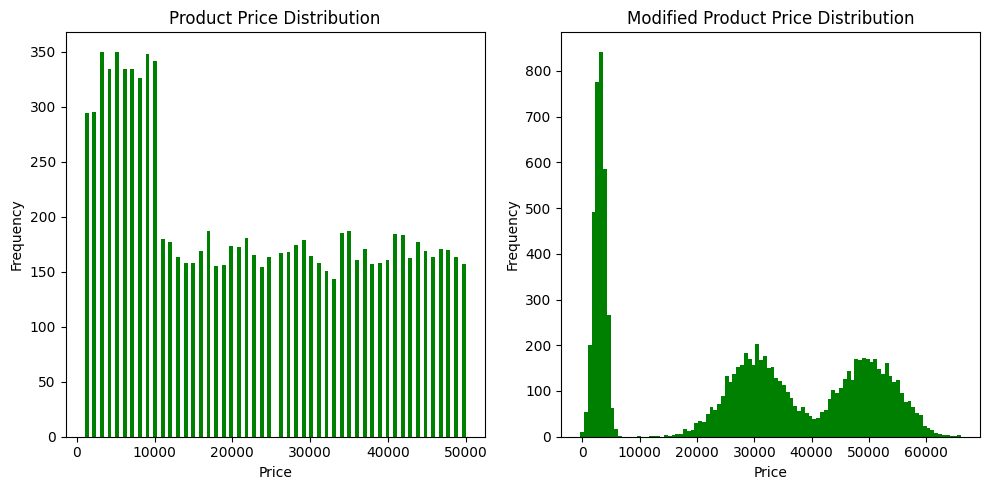

In [ ]:
# Plot 비교
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
IntegOrders['Price'].plot.hist(alpha=1, bins=100, color='g')
plt.title('Product Price Distribution')
plt.xlabel("Price")
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
IntegOrders_Mod['Price'].plot.hist(alpha=1, bins=100, color='g')
plt.title('Modified Product Price Distribution')
plt.xlabel("Price")
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

  - 수정 사항 8: 상품 구매액 분포 조정 <br>

In [ ]:
IntegOrders.head()

,OrderID,CustID,OrderDate,OrderDW,ProdID,Price,Quantity,OrderTime,OrderAmount,Gender,Age,Region
0,1,10260,2020-04-12 11:00:00,Sunday,22,31000,59,11,1829000,0,88,2
1,2,10355,2020-08-07 12:00:00,Friday,20,12000,11,12,132000,0,92,9
2,3,10117,2020-01-24 09:00:00,Friday,29,36000,5,9,180000,1,32,10
3,4,10165,2021-06-29 05:00:00,Tuesday,1,9000,27,5,243000,1,26,6
4,5,10427,2021-02-24 19:00:00,Wednesday,15,12000,5,19,60000,0,97,6
